In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
# import moss
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import os
from pandas import Timestamp
from datetime import timedelta
from sklearn.preprocessing import StandardScaler


In [2]:
home_dir = op.abspath('./')

data_files = glob.glob(op.join(home_dir,
                        'data',
                        '*.csv'))
sns.set_context('talk')

In [3]:
pilot = 'pilot_total'
df_orig = pd.read_csv(pilot + '.csv')

participant_set = set(df_orig['participant'])

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/1552102508.py:2: DtypeWarning: Columns (254,255,256,257,258,259) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orig = pd.read_csv(pilot + '.csv')


In [5]:
df = []
for sub in data_files:
    try:
        sub_df = pd.read_csv(sub)
        
        # Filter for participants in participant_set
        if any(sub_df['participant'].isin(participant_set)):
            # Filter for non-empty 'image_recall_response.keys' and reset the index
            data = sub_df.loc[sub_df['image_recall_response.keys'].notna()].reset_index(drop=True)
            df.append(data.copy())
    except Exception as e:
        print(f"Error processing file {sub}: {e}")
        
# Concatenate all filtered data into a single DataFrame
df = pd.concat(df, ignore_index=True)

# Get the count of unique participants
unique_participants_count = len(set(df['participant']))
print(unique_participants_count)

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-09_12h13.56.688.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-22_22h11.53.949.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-28_19h01.07.543.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-09-04_02h15.32.256.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-28_21h17.51.789.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-21_13h00.30.594.csv: No columns to parse from file
Error processing file /Users/lana/Deskto

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-29_19h13.31.303.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-22_18h51.55.974.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/168889_WM_Deepgen_2024-12-02_14h03.28.335.csv: 'image_recall_response.keys'
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-15_16h37.45.390.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-22_20h31.43.754.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-10-20_22h16.55.250.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psyc

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/166894_WM_Deepgen_2024-11-24_12h48.57.508.csv: 'image_recall_response.keys'
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-08-31_12h03.04.245.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-28_11h51.32.313.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-23_16h03.06.466.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-06-04_16h25.08.428.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-16_19h20.33.024.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psyc

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-15_09h54.08.716.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-15_22h08.15.368.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-11-26_10h12.09.906.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/155275_WM_Deepgen_2024-11-28_11h53.04.091.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-09-03_15h18.28.526.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-15_00h10.44.014.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psy

Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-09-03_21h57.41.765.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-05-10_15h30.07.691.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-06-04_19h00.38.301.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-04-30_22h56.36.872.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2024-04-29_22h18.28.594.csv: No columns to parse from file
Error processing file /Users/lana/Desktop/psychoPyExperiments/wm_deepgen/data/PARTICIPANT_WM_Deepgen_2025-01-29_22h54.06.052.csv: No columns to parse from file
Error processing file /Users/lana/Deskto

In [6]:
combined_df = pd.concat([df, df_orig], ignore_index=True)


In [7]:
response_counts = combined_df.groupby('participant')['image_recall_response.keys'].count().reset_index()

response_counts = response_counts.rename(columns={'image_recall_response.keys': 'image_recall_response_count'})

print(response_counts)

     participant  image_recall_response_count
0         116851                          240
1         121021                          240
2         123262                          240
3         123790                          240
4         123985                          240
..           ...                          ...
265       170536                          238
266       170665                          240
267       171031                          239
268       171253                          238
269       171304                          240

[270 rows x 2 columns]


In [8]:
min_response_count = response_counts['image_recall_response_count'].min()
min_response_count

0

In [9]:
threshold = 250 * (2 / 3)

below_threshold_count = (response_counts['image_recall_response_count'] < threshold).sum()

print(f"The number of participants with image_recall_response.keys count below {threshold} is: {below_threshold_count}")

The number of participants with image_recall_response.keys count below 166.66666666666666 is: 3


In [10]:
combined_df['acc_recall'] = np.where(combined_df['ImagePath'].str.contains("foil", case=False, na=False), 0, 1)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/424746830.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['acc_recall'] = np.where(combined_df['ImagePath'].str.contains("foil", case=False, na=False), 0, 1)


In [11]:
combined_df['mem_answ'] = np.where(combined_df['image_recall_response.keys'].isin([1, 2]), 0,
                                   np.where(combined_df['image_recall_response.keys'].isin([3, 4]), 1, np.nan))


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/2647953418.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['mem_answ'] = np.where(combined_df['image_recall_response.keys'].isin([1, 2]), 0,


In [12]:
combined_df['recall_answ'] = np.where(
    combined_df['mem_answ'].isna() | combined_df['acc_recall'].isna(), np.nan,
    np.where(
        (combined_df['mem_answ'] == 0) & (combined_df['acc_recall'] == 0) | 
        (combined_df['mem_answ'] == 1) & (combined_df['acc_recall'] == 1), 1, 0)
)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/1958824526.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['recall_answ'] = np.where(


In [15]:
combined_df = combined_df[combined_df['image_recall_response.rt'] <= 4]


In [16]:
recall_count_per_participant = combined_df.groupby('participant')['recall_answ'].sum().reset_index()

recall_count_per_participant = recall_count_per_participant.rename(columns={'recall_answ': 'recall_answ_count'})

print(recall_count_per_participant)

     participant  recall_answ_count
0         116851              128.0
1         121021              165.0
2         123262              136.0
3         123790              159.0
4         123985              150.0
..           ...                ...
263       170536              123.0
264       170665              156.0
265       171031              172.0
266       171253              133.0
267       171304              159.0

[268 rows x 2 columns]


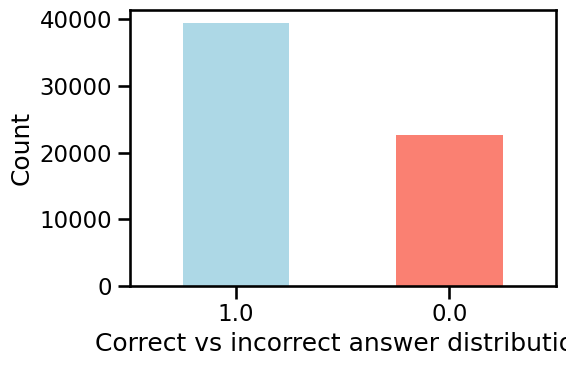

In [17]:
recall_counts = combined_df['recall_answ'].value_counts()

plt.figure(figsize=(6, 4))
recall_counts.plot(kind='bar', color=['lightblue', 'salmon'])
# plt.title('Counts of Recall Ans = 1 vs 0')
plt.xlabel('Correct vs incorrect answer distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()

In [18]:
answer_mapping = {1: 'Definitely not seen', 2: 'Probably not seen',
                  3: 'Probably seen', 4: 'Definitely seen'}

combined_df['Answer Labels'] = combined_df['image_recall_response.keys'].map(answer_mapping)


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/3563330006.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['Answer Labels'] = combined_df['image_recall_response.keys'].map(answer_mapping)


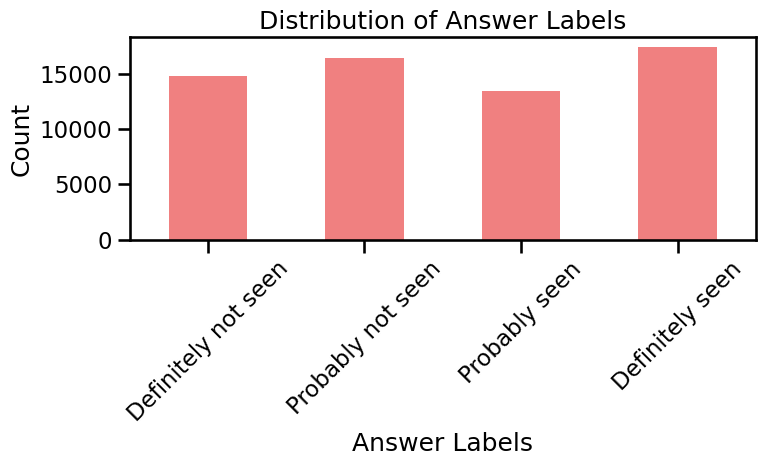

In [19]:
label_order = [
    'Definitely not seen', 
    'Probably not seen', 
    'Probably seen', 
    'Definitely seen'
]

# Count occurrences and sort by the defined order
answer_counts = combined_df['Answer Labels'].value_counts()
answer_counts = answer_counts.reindex(label_order)

plt.figure(figsize=(8, 5))
answer_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Answer Labels')
plt.xlabel('Answer Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

In [20]:
df = combined_df

In [21]:
correctLTM_df = df[df['recall_answ'] == 1]

correctLTM_df['Answer Labels'] = correctLTM_df['image_recall_response.keys'].map(answer_mapping)


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/2467276519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correctLTM_df['Answer Labels'] = correctLTM_df['image_recall_response.keys'].map(answer_mapping)


In [22]:
answer_counts_corr = correctLTM_df['Answer Labels'].value_counts()
answer_counts_corr = answer_counts_corr.reindex(label_order)

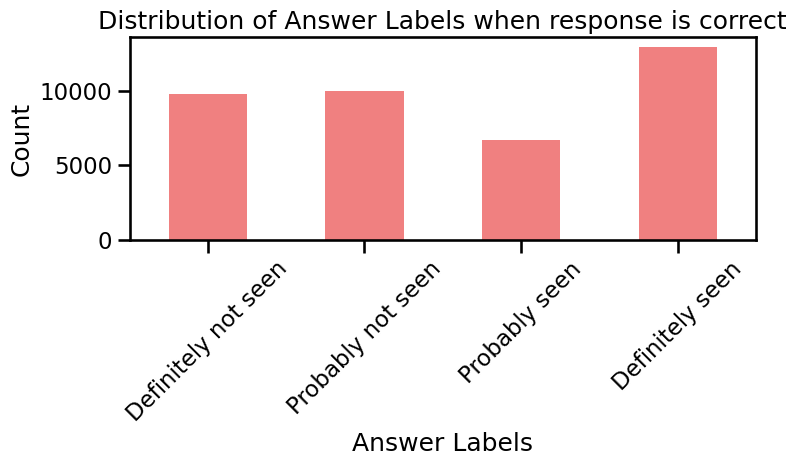

In [23]:
plt.figure(figsize=(8, 5))
answer_counts_corr.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Answer Labels when response is correct')
plt.xlabel('Answer Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/1710196208.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['recall_category'] = df['image_recall_response.keys'].map({
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/1710196208.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['correct_recall'] = ((df['acc_recall'] == 1) &


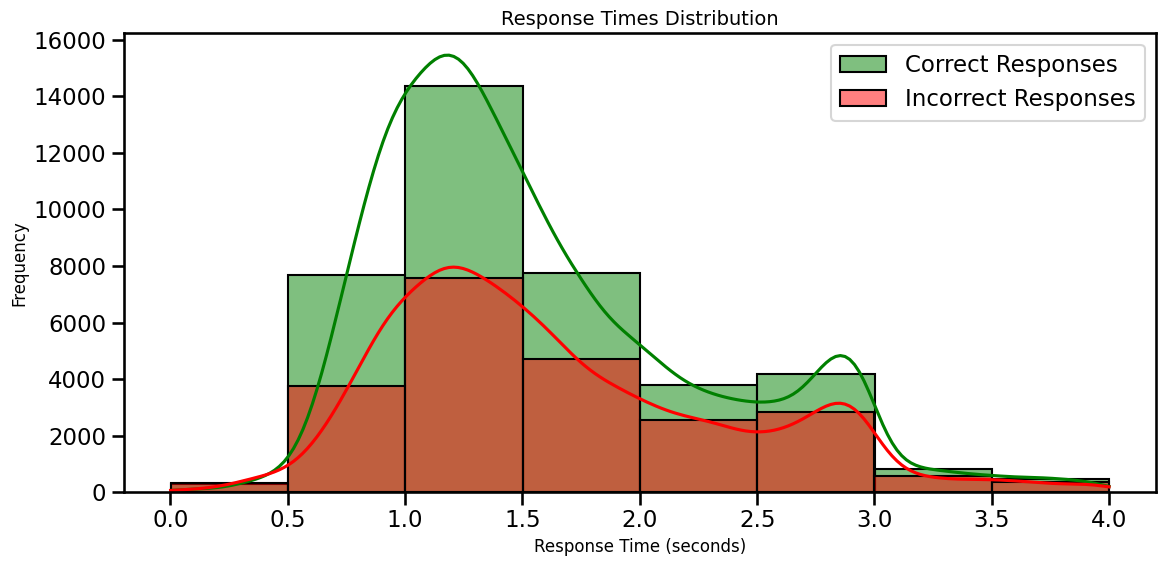

count    62043.000000
mean         1.606918
std          0.711927
min          0.000400
25%          1.080950
50%          1.420700
75%          2.006700
max          3.999800
Name: image_recall_response.rt, dtype: float64


In [24]:
df['recall_category'] = df['image_recall_response.keys'].map({
    1: 'Definitely not seen',
    2: 'Probably not seen',
    3: 'Probably seen',
    4: 'Definitely seen'
})

df['correct_recall'] = ((df['acc_recall'] == 1) & 
                              (df['Answer Labels'].isin(['Probably seen', 'Definitely seen']))) | \
                             ((df['acc_recall'] == 0) & 
                              (df['Answer Labels'].isin(['Definitely not seen', 'Probably not seen'])))



response_time_column = 'image_recall_response.rt'
correct_response_times = df[df['recall_answ'] == 1][response_time_column].dropna()
incorrect_response_times = df[df['recall_answ'] == 0][response_time_column].dropna()

# Get summary statistics for response times
response_time_stats = df[response_time_column].describe()

# Plotting the response times distribution
plt.figure(figsize=(12, 6))
sns.histplot(correct_response_times, color='green', kde=True, label='Correct Responses', binwidth=0.5)
sns.histplot(incorrect_response_times, color='red', kde=True, label='Incorrect Responses', binwidth=0.5)

plt.title('Response Times Distribution', fontsize=14)
plt.xlabel('Response Time (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Displaying summary statistics for response times
print(response_time_stats)


#####more fine graned bins

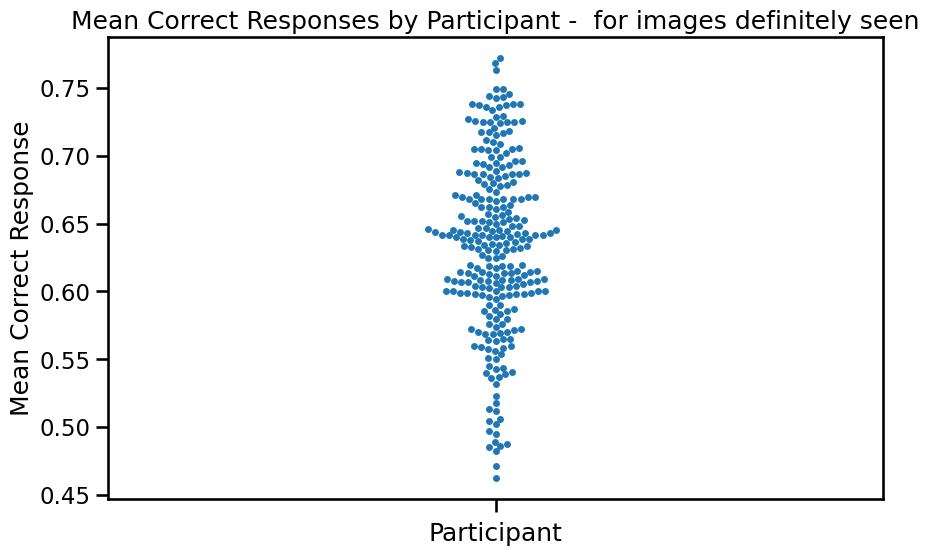

In [25]:
# Convert 'resp_correct' to numeric, coercing errors to NaN (non-numeric to NaN)
df['recall_answ'] = pd.to_numeric(df['recall_answ'], errors='coerce')

# Now, calculate the mean 'resp_correct' for each participant
mean_resp_correct = df.groupby('participant')['recall_answ'].mean().reset_index()

# Create the swarm plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
sns.swarmplot(y='recall_answ', data=mean_resp_correct)

plt.title('Mean Correct Responses by Participant -  for images definitely seen')
plt.xlabel('Participant')
plt.ylabel('Mean Correct Response')

# Show the plot
plt.show()

In [26]:
##acc_recall is 1 if the image was actually seen
##mem_answ is 1 if the said seen or probably seen
###recall_answ is 1 if these two are both 1 or both 0
cols_to_copy = ['attend', 'reliability', 'validity', 'test_item']


In [27]:
prc = []
for a in df['acc_recall']:
    if a == 1:
        prc.append('Correct')
    else:
        prc.append('Wrong')
df['Past Response Correctness'] = prc


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/477457660.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Past Response Correctness'] = prc


In [28]:
def fill_non_nan_columns(row):
    # Locate matching rows in df_orig based on participant and image conditions
    matching_rows = df_orig[
        (df_orig['participant'] == row['participant']) &
        ((df_orig['img1'] == row['ImagePath']) | 
         (df_orig['img2'] == row['ImagePath']) | 
         (df_orig['ping_img'] == row['ImagePath']))
    ]
    
    if not matching_rows.empty:
        match = matching_rows.iloc[0]
        for col in match.index:
            # Skip columns that identify rows (not to be copied over) and only copy non-NaN values
            if col not in ['participant'] and pd.notna(match[col]):
                row[col] = match[col]
    return row

df = df.apply(lambda row: fill_non_nan_columns(row) if row['acc_recall'] == 1 else row, axis=1)


In [29]:
def remove_unit_variance(df, col, unit, group=None, suffix="_within"):
    """Remove variance between sampling units.

    This is useful for plotting repeated-measures data using within-unit
    error bars.

    Parameters
    ----------
    df : DataFrame
        Input data. Will have a new column added.
    col : column name
        Column in dataframe with quantitative measure to modify.
    unit : column name
        Column in dataframe defining sampling units (e.g., subjects).
    group : column name(s), optional
        Columns defining groups to remove unit variance within.
    suffix : string, optional
        Suffix appended to ``col`` name to create new column.

    Returns
    -------
    df : DataFrame
        Returns modified dataframe.

    """
    new_col = col + suffix

    def demean(x):
        return x - x.mean()

    if group is None:
        new = df.groupby(unit)[col].transform(demean)
        new += df[col].mean()
        df.loc[:, new_col] = new
    else:
        df.loc[:, new_col] = np.nan
        for level, df_level in df.groupby(group):
            new = df_level.groupby(unit)[col].transform(demean)
            new += df_level[col].mean()
            df.loc[new.index, new_col] = new

    return df

In [30]:
palette = sns.color_palette("husl", n_colors=2)[::-1]  # Reverse the color order


In [31]:
def is_mean_centered(series, tol=1e-6):
    return abs(series.mean()) < tol


In [32]:
df['Distractor V2 Similarity Preference'] = df['v2_prefers'] 
df['Distractor IT Similarity Preference'] = df['it_prefers']

column_params = {
    'v2': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']},
    'it': {'n_cats': 5, 'labels': ['Least Similar', '', ' ', '   ', 'Most Similar']}
}

for label in ['it_sim_dis_attend', 'v2_sim_dis_attend', 'it_sim_dis_unattend', 'v2_sim_dis_unattend', 'it_sim_dis_diff', 'v2_sim_dis_diff', 'it_im1_im2', 'v2_im1_im2', 'it_sim_dis_test', 'v2_sim_dis_test', 'it_sim_dis_untest', 'v2_sim_dis_untest', 'it_sim_dis_diff_test', 'v2_sim_dis_diff_test', 'v2_sim_dis_diff_sq', 'it_sim_dis_diff_sq', 'v2_sim_dis_diff_test_sq','it_sim_dis_diff_test_sq']:
    
    if 'v2' in label:
        n_cats = column_params['v2']['n_cats']
        labels = column_params['v2']['labels']
    else:
        n_cats = column_params['it']['n_cats']
        labels = column_params['it']['labels']
    
    df[label + '_cat'] = pd.qcut(df[label], q=n_cats, labels=labels, duplicates='drop')


df['V2 Distractor Similarity\nto Prioritized Item'] = df['v2_sim_dis_attend_cat']
df['IT Distractor Similarity\nto Prioritized Item'] = df['it_sim_dis_attend_cat']
df['V2 Distractor Similarity\nto Deprioritized Item'] = df['v2_sim_dis_unattend_cat']
df['IT Distractor Similarity\nto Deprioritized Item'] = df['it_sim_dis_unattend_cat']
df['Prioritized - Deprioritized IT Distractor Similarity'] = df['it_sim_dis_diff_cat'] 
df['Prioritized - Deprioritized V2 Distractor Similarity'] = df['v2_sim_dis_diff_cat'] 
df['Prioritized - Deprioritized IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_sq_cat'] 
df['Prioritized - Deprioritized V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_sq_cat'] 


df['V2 Distractor Similarity\nto Tested Item'] = df['v2_sim_dis_test_cat']
df['IT Distractor Similarity\nto Tested Item'] = df['it_sim_dis_test_cat']
df['V2 Distractor Similarity\nto Untested Item'] = df['v2_sim_dis_untest_cat']
df['IT Distractor Similarity\nto Untested Item'] = df['it_sim_dis_untest_cat']
df['Tested - Untested IT Distractor Similarity'] = df['it_sim_dis_diff_test_cat'] 
df['Tested - Untested V2 Distractor Similarity'] = df['v2_sim_dis_diff_test_cat'] 
df['Tested - Untested IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_test_sq_cat'] 
df['Tested - Untested V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_test_sq_cat'] 


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/2688763724.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label + '_cat'] = pd.qcut(df[label], q=n_cats, labels=labels, duplicates='drop')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/2688763724.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label + '_cat'] = pd.qcut(df[label], q=n_cats, labels=labels, duplicates='drop')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/2688763724.py:18: PerformanceWarning: DataF

In [33]:
df['tested_item'] = df['Tested Item']
df['ret_rel'] = df['Retrocue Reliability']

In [34]:
df['IT_diff_binned'] = pd.qcut(df['it_sim_dis_diff'], 5, duplicates='drop')
df['V2_diff_binned'] = pd.qcut(df['v2_sim_dis_diff'], 5, duplicates='drop')
df['IT_diff_binned_sq'] = pd.qcut(df['it_sim_dis_diff_sq'], 5, duplicates='drop')
df['V2_diff_binned_sq'] = pd.qcut(df['v2_sim_dis_diff_sq'], 5, duplicates='drop')


df['IT_diff_binned_test'] = pd.qcut(df['it_sim_dis_diff_test'], 5, duplicates='drop')
df['V2_diff_binned_test'] = pd.qcut(df['v2_sim_dis_diff_test'], 5, duplicates='drop')
df['IT_diff_binned_test_sq'] = pd.qcut(df['it_sim_dis_diff_test_sq'], 5, duplicates='drop')
df['V2_diff_binned_test_sq'] = pd.qcut(df['v2_sim_dis_diff_test_sq'], 5, duplicates='drop')

def round_to_significant_figures(x, sig_figs=2):
    if x == 0:
        return 0
    else:
        return round(x, sig_figs - int(np.floor(np.log10(abs(x)))) - 1)


def process_interval(interval):
    # Round both bounds
    lower_rounded = round_to_significant_figures(interval.left)
    upper_rounded = round_to_significant_figures(interval.right)
    # Return a new interval with the rounded bounds
    return pd.Interval(lower_rounded, upper_rounded)

df['IT_diff_binned'] = df['IT_diff_binned'].apply(process_interval)
df['V2_diff_binned'] = df['V2_diff_binned'].apply(process_interval)
df['IT_diff_binned_sq'] = df['IT_diff_binned_sq'].apply(process_interval)
df['V2_diff_binned_sq'] = df['V2_diff_binned_sq'].apply(process_interval)

df['IT_diff_binned_test'] = df['IT_diff_binned_test'].apply(process_interval)
df['V2_diff_binned_test'] = df['V2_diff_binned_test'].apply(process_interval)
df['IT_diff_binned_test_sq'] = df['IT_diff_binned_test_sq'].apply(process_interval)
df['V2_diff_binned_test_sq'] = df['V2_diff_binned_test_sq'].apply(process_interval)

df['Prioritized - Deprioritized V2 Distractor Similarity Ranges'] = df['V2_diff_binned']
df['Prioritized - Deprioritized IT Distractor Similarity Ranges'] = df['IT_diff_binned']
df['Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_sq']
df['Prioritized - Deprioritized IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_sq']

df['Tested - Untested V2 Distractor Similarity Ranges'] = df['V2_diff_binned_test']
df['Tested - Untested IT Distractor Similarity Ranges'] = df['IT_diff_binned_test']
df['Tested - Untested V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_test_sq']
df['Tested - Untested IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_test_sq']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/641193304.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['IT_diff_binned_sq'] = pd.qcut(df['it_sim_dis_diff_sq'], 5, duplicates='drop')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/641193304.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['V2_diff_binned_sq'] = pd.qcut(df['v2_sim_dis_diff_sq'], 5, duplicates='drop')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/641193304.py:9: PerformanceWarning: DataFrame is hi

In [35]:
df['V2 Distractor Similarity to Tested Item'] = df['v2_sim_dis_test']
df['IT Distractor Similarity to Tested Item'] = df['it_sim_dis_test']
df['Tested - Untested V2 Distractor Similarity'] = df['v2_sim_dis_diff_test']
df['Tested - Untested IT Distractor Similarity'] = df['it_sim_dis_diff_test']



In [36]:
df['category'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
    else ('foil' if 'foil' in str(row['ImagePath']).lower()
          else ('tested' if ((row['ImagePath'] == row['img1'] and row['test_item'] == 'img1') or 
                             (row['ImagePath'] == row['img2'] and row['test_item'] == 'img2'))
                else 'not tested')),
    axis=1
)


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/1383008241.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['category'] = df.apply(


In [38]:
df['Tested'] = df['category']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/3026568815.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Tested'] = df['category']


In [39]:
df['Attend'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img']
    else 'foil' if (row['category']== 'foil')
    else 'attended' if ((row['ImagePath'] == row['img1'] and row['attend'] == 'img1') or 
                             (row['ImagePath'] == row['img2'] and row['attend'] == 'img2'))
    else 'not attended',
    axis=1
)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/241223853.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Attend'] = df.apply(


In [40]:
def calculate_ltm_reliability(row):
    if (row['category']== 'foil'):
        return 'foil'
    elif row['reliability'] > 0.7:
        return 'high'
    elif row['reliability'] < 0.7:
        return 'low'
    
    else:
        return None  # Optional: Default case, if needed

# Apply the function to the dataframe
df['Reliability'] = df.apply(calculate_ltm_reliability, axis=1)


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/2768316501.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Reliability'] = df.apply(calculate_ltm_reliability, axis=1)


In [41]:
scaler = StandardScaler()
df['attend_binary'] = np.where(df['Attend'] == 'attended',0 , 1)
df['attend_binary_z'] = scaler.fit_transform(df[['attend_binary']])
scaler = StandardScaler()
df['tested_binary'] = np.where(df['Tested'] == 'tested',0 , 1)
df['tested_binary_z'] = scaler.fit_transform(df[['tested_binary']])


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/870860499.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['attend_binary'] = np.where(df['Attend'] == 'attended',0 , 1)
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/870860499.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['attend_binary_z'] = scaler.fit_transform(df[['attend_binary']])
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/870860499.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usual

In [42]:
is_mean_centered(df['IT_root_im2'])


False

In [43]:
def is_mean_centered_ignore_nan(series, tol=1e-6):
    mean_val = series.mean(skipna=True)
    return abs(mean_val) < tol
    
is_mean_centered_ignore_nan(df['IT_root_im2'])


False

In [44]:

def z_score(series):
    mean_val = series.mean(skipna=True)
    std_val = series.std(skipna=True)
    return (series - mean_val) / std_val
 

In [45]:
###there its df_filtered df_filtered = df[(df['category'] == 'tested') | (df['category'] == 'not tested')]


df['it_ltm'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        row['IT_root_im1'] if (row['ImagePath'] == row['img1']) else (
            row['IT_root_im2'] if (row['ImagePath'] == row['img2'] ) else 
            'not tested'
        )
    ),
    axis=1
)
    
df['v2_ltm'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        row['V2_root_im1'] if (row['ImagePath'] == row['img1']) else (
            row['V2_root_im2'] if (row['ImagePath'] == row['img2'] ) else 
            'not tested'
        )
    ),
    axis=1
)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/3379015507.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['it_ltm'] = df.apply(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/3379015507.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['v2_ltm'] = df.apply(


In [46]:
 ####this is df_filtered there   
df['it_ltm_diff'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        (row['IT_root_im1'] - row['IT_root_im2']) if (row['ImagePath'] == row['img1']) else (
        (row['IT_root_im2'] - row['IT_root_im1']) if (row['ImagePath'] == row['img2'] ) else 
            'not tested'
        )
    ),
    axis=1
)

    
df['v2_ltm_diff'] = df.apply(
    lambda row: 'distractor' if row['ImagePath'] == row['ping_img'] else (
        (row['V2_root_im1'] - row['V2_root_im2']) if (row['ImagePath'] == row['img1']) else (
        (row['V2_root_im2'] - row['V2_root_im1']) if (row['ImagePath'] == row['img2'] ) else 
            'not tested'
        )
    ),
    axis=1
)




/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/3054671882.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['it_ltm_diff'] = df.apply(
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/3054671882.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['v2_ltm_diff'] = df.apply(


In [47]:


df_filtered = df[(df['category'] == 'tested') | (df['category'] == 'not tested')]
df_distractor = df[df['category'] == 'distractor']

In [48]:
# First, convert the columns to numeric type
df_filtered['v2_ltm'] = pd.to_numeric(df_filtered['v2_ltm'], errors='coerce')
df_filtered['it_ltm'] = pd.to_numeric(df_filtered['it_ltm'], errors='coerce')
df_filtered['v2_ltm_diff'] = pd.to_numeric(df_filtered['v2_ltm_diff'], errors='coerce')
df_filtered['it_ltm_diff'] = pd.to_numeric(df_filtered['it_ltm_diff'], errors='coerce')

# Then create squared columns using vectorized operations (more efficient than list comprehension)
df_filtered['v2_ltm_sq'] = df_filtered['v2_ltm']**2
df_filtered['it_ltm_sq'] = df_filtered['it_ltm']**2
df_filtered['v2_ltm_diff_sq'] = df_filtered['v2_ltm_diff']**2
df_filtered['it_ltm_diff_sq'] = df_filtered['it_ltm_diff']**2

# Z-score all columns
for l in ['v2_ltm','it_ltm', 'v2_ltm_diff', 'it_ltm_diff', 'v2_ltm_sq', 'it_ltm_sq', 'v2_ltm_diff_sq', 'it_ltm_diff_sq']:
    df_filtered[l+'_z'] = z_score(df_filtered[l])

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/1721027028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['v2_ltm'] = pd.to_numeric(df_filtered['v2_ltm'], errors='coerce')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/1721027028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['it_ltm'] = pd.to_numeric(df_filtered['it_ltm'], errors='coerce')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/1721027028.py:4: SettingWithCopyWar

In [49]:
df_distractor = df[df['category'] == 'distractor']


In [50]:

df_filtered['it_pos_neg_ltm'] =  np.where(df_filtered['it_ltm_diff'] <= 0, -1, 1)
df_filtered['v2_pos_neg_ltm'] =  np.where(df_filtered['v2_ltm_diff'] <= 0, -1, 1)

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/2289843736.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_filtered['it_pos_neg_ltm'] =  np.where(df_filtered['it_ltm_diff'] <= 0, -1, 1)
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/2289843736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['it_pos_neg_ltm'] =  np.where(df_filtered['it_ltm_diff'] <= 0, -1, 1)
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/2289843736.py:2: PerformanceWarning: D

In [51]:
df_filtered_corr = df_filtered[df_filtered['resp_correct'] == 1.0]

In [52]:
df_distractor_correct_wm = df_distractor[
    ((df_distractor['resp_correct'] == 1))
]

df_distractor_correct_wm = remove_unit_variance(df_distractor_correct_wm,'recall_answ','participant')
df_distractor_correct_wm['LTM Accuracy'] = df_distractor_correct_wm['recall_answ_within']
# df_distractor_correct_wm = remove_unit_variance(df_distractor_correct_wm,'mouse.time_last','participant')
# df_distractor_correct_wm['analysis_rt'] = df_distractor_correct_wm['mouse.time_last_within']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/3458006234.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, new_col] = new
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/3458006234.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, new_col] = new
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/2030160833.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor 

In [53]:
df_correct_wm = df_filtered[
    ((df_filtered['resp_correct'] == 1))
]

df_correct_wm = remove_unit_variance(df_correct_wm,'recall_answ','participant')
df_correct_wm['LTM Accuracy'] = df_correct_wm['recall_answ_within']
# df_correct_wm = remove_unit_variance(df_correct_wm,'mouse.time_last','participant')
# df_correct_wm['analysis_rt'] = df_correct_wm['mouse.time_last_within']


df_incorrect_wm = df_filtered[
    ((df_filtered['resp_correct'] == 0))
]

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/3458006234.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, new_col] = new
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/3458006234.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, new_col] = new
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/1984203760.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor 

In [54]:



def flip_z_sq_z(df, column_name):
    scaler = StandardScaler()
    
    df[column_name + '_sign'] = np.where(df[column_name] <= 0, -1, 1) * df[column_name]
    
    df[column_name + '_sign_z'] = scaler.fit_transform(df[[column_name + '_sign']])
    scaler = StandardScaler()

    
    df[column_name + '_sign_sq'] = df[column_name + '_sign_z'] ** 2
    
    df[column_name + '_sign_sq_z'] = scaler.fit_transform(df[[column_name + '_sign_sq']])
    
    return df

for l in ['v2_ltm_diff', 'it_ltm_diff', 'v2_ltm', 'it_ltm']:
    df_correct_wm = flip_z_sq_z(df_correct_wm, l)


for l in ['v2_sim_dis_diff_test', 'it_sim_dis_diff_test', 'v2_sim_dis_test', 'it_sim_dis_test']:
    df_distractor_correct_wm = flip_z_sq_z(df_distractor_correct_wm, l)



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/1707439513.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name + '_sign'] = np.where(df[column_name] <= 0, -1, 1) * df[column_name]
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/1707439513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '_sign'] = np.where(df[column_name] <= 0, -1, 1) * df[column_name]
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/1707439513.py:6: PerformanceWarnin

In [55]:
def is_z_scored(series, mean_tol=1e-6, std_tol=1e-6):
    mean_val = series.mean(skipna=True)
    std_val = series.std(skipna=True)
    return (abs(mean_val) < mean_tol) and (abs(std_val - 1) < std_tol)


In [56]:
df_correct_wm['it_ltm'] = pd.to_numeric(df_correct_wm['it_ltm'], errors='coerce')
df_correct_wm['v2_ltm'] = pd.to_numeric(df_correct_wm['v2_ltm'], errors='coerce')
df_correct_wm['it_ltm_diff'] = pd.to_numeric(df_correct_wm['it_ltm_diff'], errors='coerce')
df_correct_wm['v2_ltm_diff'] = pd.to_numeric(df_correct_wm['v2_ltm_diff'], errors='coerce')

df_correct_wm['IT_ltm_binned'] = pd.qcut(df_correct_wm['it_ltm_diff'], 5, duplicates='drop')
df_correct_wm['V2_ltm_binned'] = pd.qcut(df_correct_wm['v2_ltm_diff'], 5, duplicates='drop')
df_correct_wm['IT_ltm_abs_binned'] = pd.qcut(df_correct_wm['it_ltm'], 5, duplicates='drop')
df_correct_wm['V2_ltm_abs_binned'] = pd.qcut(df_correct_wm['v2_ltm'], 5, duplicates='drop')

df_correct_wm['IT_ltm_binned'] = df_correct_wm['IT_ltm_binned'].apply(process_interval)
df_correct_wm['V2_ltm_binned'] = df_correct_wm['V2_ltm_binned'].apply(process_interval)
df_correct_wm['IT_ltm_abs_binned'] = df_correct_wm['IT_ltm_abs_binned'].apply(process_interval)
df_correct_wm['V2_ltm_abs_binned'] = df_correct_wm['V2_ltm_abs_binned'].apply(process_interval)



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/2238935982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_wm['it_ltm'] = pd.to_numeric(df_correct_wm['it_ltm'], errors='coerce')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/2238935982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_wm['v2_ltm'] = pd.to_numeric(df_correct_wm['v2_ltm'], errors='coerce')
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/2238935982.py:3: SettingWit

In [57]:
for l in ['it_ltm', 'v2_ltm', 'it_ltm_sq', 'v2_ltm_sq', 'reliability_binary', 'attend_binary', 'tested_binary'
         , 'it_ltm_diff', 'v2_ltm_diff', 'it_ltm_diff_sq', 'v2_ltm_diff_sq']:
    df_correct_wm[l+'_z'] = z_score(df_correct_wm[l])


for l in ['it_sim_dis_test', 'v2_sim_dis_test', 'it_sim_dis_test_sq', 'v2_sim_dis_test_sq', 
          'reliability_binary', 'validity_binary', 'tested_binary',
          'it_sim_dis_diff_test', 'v2_sim_dis_diff_test', 'it_sim_dis_diff_test_sq', 'v2_sim_dis_diff_test_sq']:
    df_distractor_correct_wm[l+'_z'] = z_score(df_distractor_correct_wm[l])




/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/2440749792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_wm[l+'_z'] = z_score(df_correct_wm[l])
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/2440749792.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distractor_correct_wm[l+'_z'] = z_score(df_distractor_correct_wm[l])


In [58]:

pilot_name = pilot + "_stats"  # or "pilot6_stats", "pilot_total_stats", etc.

output_file_correct = os.path.join(pilot_name, "correct_wm_ltm.csv")
df_correct_wm.to_csv(output_file_correct, index=False)

In [59]:
output_file_incorrect = os.path.join(pilot_name, "incorrect_wm_ltm.csv")
df_incorrect_wm.to_csv(output_file_incorrect, index=False)

In [60]:
output_file_distractor = os.path.join(pilot_name, "distractor_wm_ltm.csv")
df_distractor_correct_wm.to_csv(output_file_distractor, index=False)


In [61]:
df_correct_wm['IT Distractor Similarity\nto LTM Item'] = df_correct_wm['IT_ltm_abs_binned']
df_correct_wm['V2 Distractor Similarity\nto LTM Item'] = df_correct_wm['V2_ltm_abs_binned']
df_correct_wm['LTM - NonLTM IT\nDistractor Similarity'] = df_correct_wm['IT_ltm_binned']
df_correct_wm['LTM - NonLTM V2\nDistractor Similarity'] = df_correct_wm['V2_ltm_binned']

df_correct_wm['LTM - NonLTM V2 Distractor Similarity'] = df_correct_wm['v2_ltm_diff']
df_correct_wm['LTM - NonLTM IT Distractor Similarity'] = df_correct_wm['it_ltm_diff']

df_correct_wm['V2 Distractor Similarity to LTM Item'] = df_correct_wm['v2_ltm']
df_correct_wm['IT Distractor Similarity to LTM Item'] = df_correct_wm['it_ltm']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/631377362.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_correct_wm['IT Distractor Similarity\nto LTM Item'] = df_correct_wm['IT_ltm_abs_binned']
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/631377362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correct_wm['IT Distractor Similarity\nto LTM Item'] = df_correct_wm['IT_ltm_abs_binned']
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/631377362.py:2: Perf

<Figure size 1000x1000 with 0 Axes>

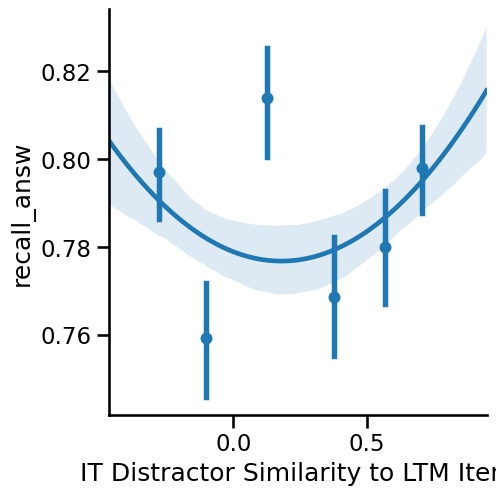

In [77]:
sns.set_context()
plt.figure(figsize=(10, 10))
sns.lmplot(
    x = 'IT Distractor Similarity to LTM Item',
    y='recall_answ',
    x_bins = 6,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df_correct_wm
)


In [63]:
# remove_unit_variance( df_distractor_correct_wm,'image_recall_response.rt', 'participant')
# df_distractor_correct_wm['LTM RT'] = df_distractor_correct_wm['image_recall_response.rt_within']

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/3458006234.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[:, new_col] = new
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/3458006234.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, new_col] = new
/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_30806/1330044872.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor 